In [1]:
import seaborn as sns
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
column_names = [
    "CRIM",     # per capita crime rate by town
    "ZN",       # proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS",    # proportion of non-retail business acres per town
    "CHAS",     # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",      # nitric oxides concentration (parts per 10 million)
    "RM",       # average number of rooms per dwelling
    "AGE",      # proportion of owner-occupied units built prior to 1940
    "DIS",      # weighted distances to five Boston employment centres
    "RAD",      # index of accessibility to radial highways
    "TAX",      # full-value property-tax rate per $10,000
    "PTRATIO",  # pupil-teacher ratio by town
    "B",        # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT",    # % lower status of the population
    "MEDV"      # Median value of owner-occupied homes in $1000's
]


# Load the Boston dataset from the provided URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Reconstruct the full dataset (features + target)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]  # Extract the target (house price)

# Create a Pandas DataFrame with the correct column names
df = pd.DataFrame(data, columns=column_names[:-1])  # Add only the feature names
df["MEDV"] = target  # Append the target column

# Display the first few rows
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.isnull().sum()


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [11]:
df.duplicated().sum()


0

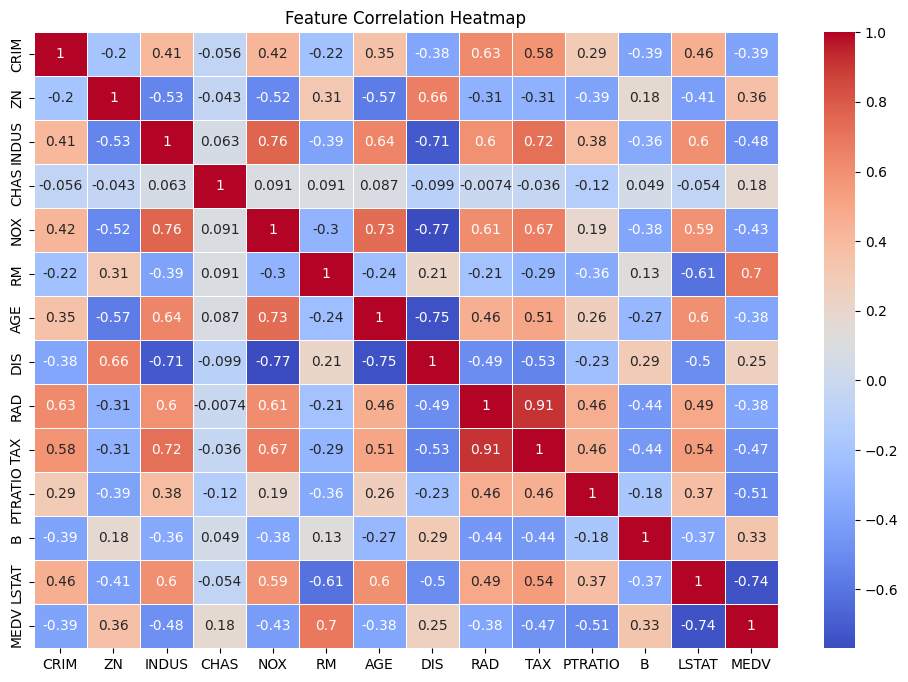

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# prompt: can you decribe the heat map from above

The heatmap visualizes the correlation matrix of the features (and target variable 'MEDV') in the Boston Housing dataset.  Each square represents the correlation coefficient between two variables.

* **Color Intensity:**  The color intensity indicates the strength of the correlation.  Darker red shades represent strong positive correlations (as one variable increases, the other tends to increase), while darker blue shades represent strong negative correlations (as one variable increases, the other tends to decrease).  Lighter colors (near white) indicate weak or no correlation.

* **Values in Squares:** The numbers within each square are the correlation coefficients, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation).  A value of 0 means no linear relationship.

* **Diagonal:** The diagonal line from top-left to bottom-right always shows perfect positive correlation (1) because each variable is perfectly correlated with itself.

**Interpreting Key Relationships (examples, based on typical Boston Housing data correlations):**

* **Strong Positive Correlations:** You might see a strong positive correlation between `NOX` (nitric oxides concentration) and `INDUS` (proportion of non-retail business acres).  This makes sense – industrial areas tend to have higher pollution.  You might also observe a positive correlation between `RM` (average number of rooms) and `MEDV` (median house value) - more rooms generally correlate with higher house prices.

* **Strong Negative Correlations:**  `LSTAT` (% lower status of the population) will likely show a strong negative correlation with `MEDV`.  Areas with a higher percentage of lower-status population tend to have lower median house values.

* **Weak or No Correlation:** Some variables might show weak or no correlation with each other.  The presence of a near-zero correlation coefficient and light color in the heatmap would indicate this.


**Overall:** The heatmap provides a quick overview of the relationships between variables, helping identify features that might be highly influential in predicting the target variable (`MEDV` in this case) or features that might be redundant (highly correlated with each other).  It's a crucial step in feature selection and understanding the data before building predictive models.


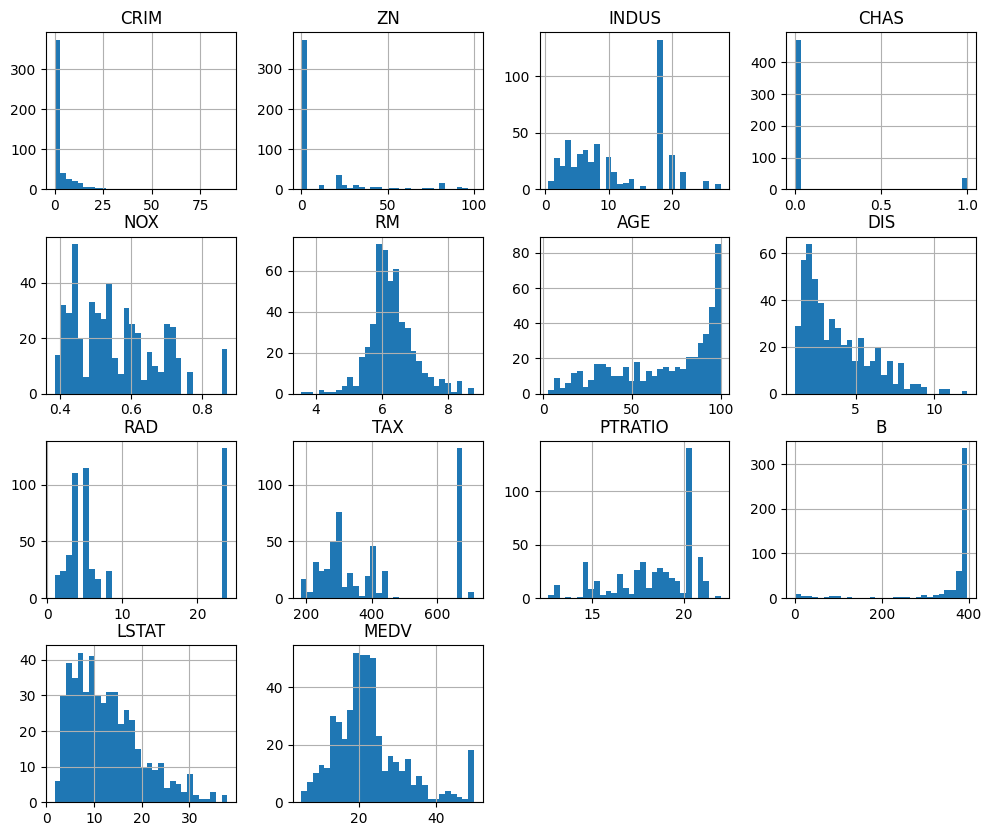

In [13]:
df.hist(figsize=(12,10), bins=30)
plt.show()


In [14]:
X = df.loc[:, df.columns != 'MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
y = df.loc[:,'MEDV']
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


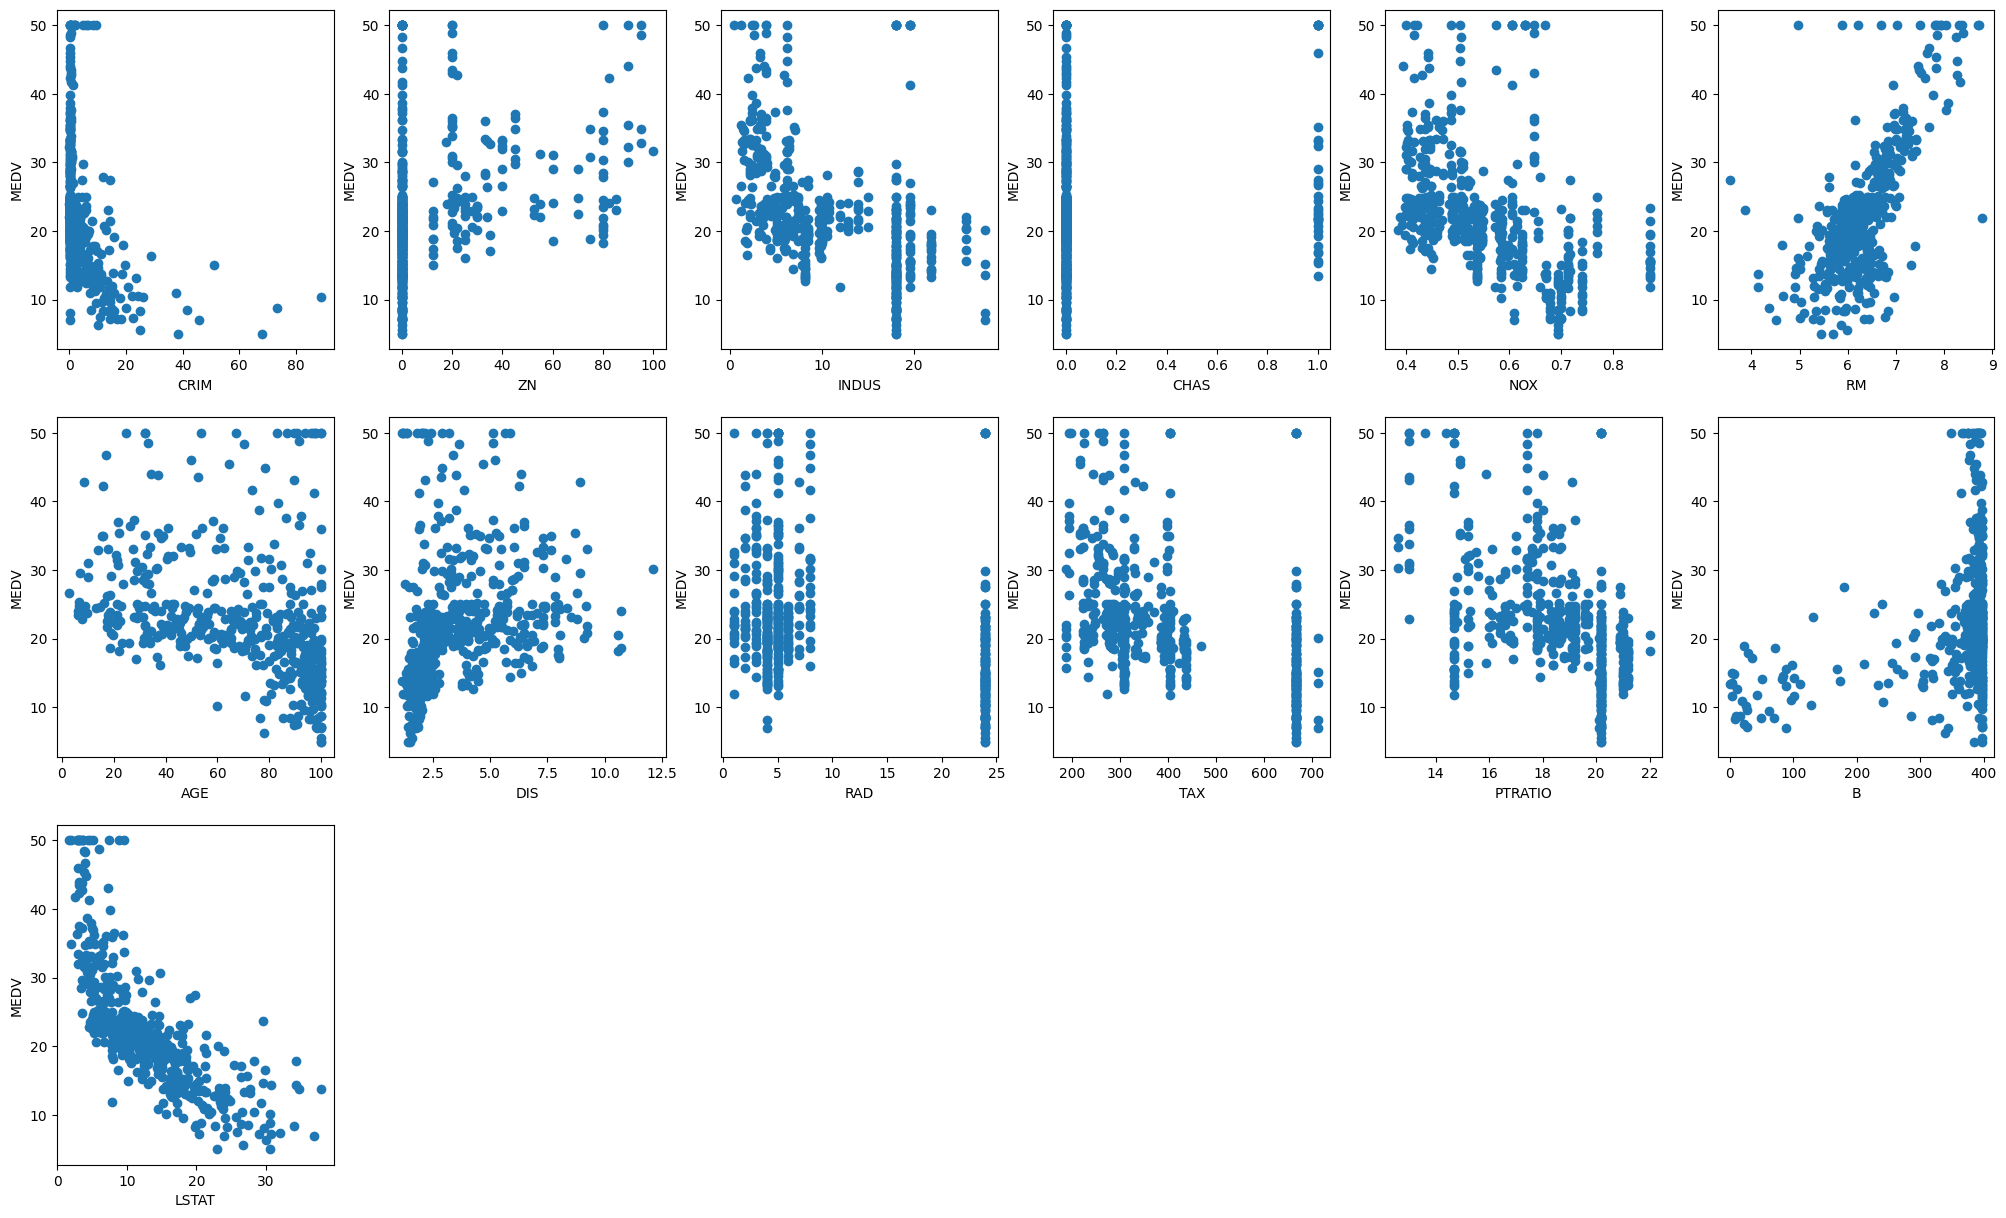

In [16]:
plt.figure(figsize = ( 25 , 15 ))
features = list (X)
for i, col in enumerate (features):
    plt.subplot(3 , 6 ,i +1 )
    x = df[col]
    y = y
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col)
    plt.ylabel( 'MEDV' )

In [17]:
df['LSTAT'] = np.log(df['LSTAT'])
df['DIS'] = np.log(df['DIS'])
df['CRIM'] = np.log(df['CRIM'])

<Axes: xlabel='CRIM', ylabel='MEDV'>

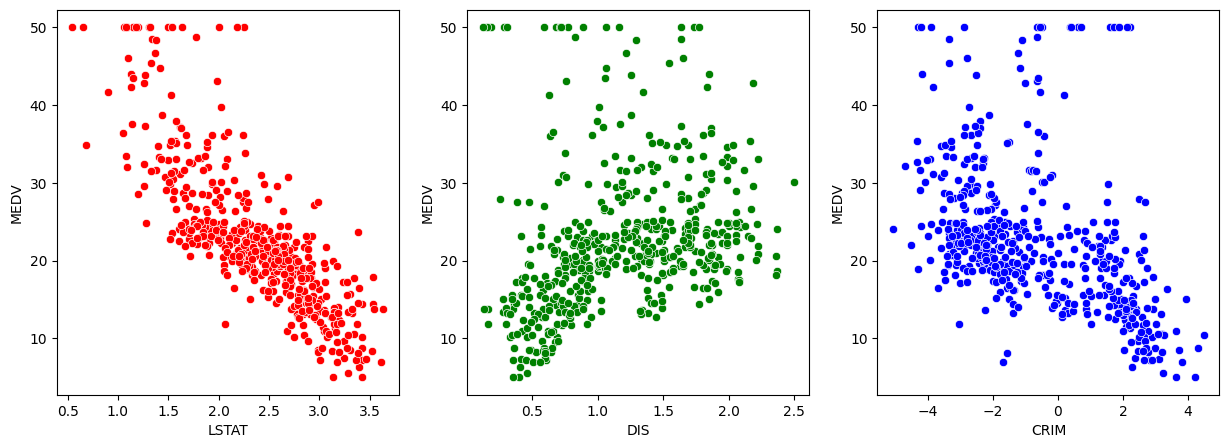

In [18]:
fig, ax =plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(data=df, color='r', x='LSTAT', y='MEDV', ax=ax[0])
sns.scatterplot(data=df, color='g', x='DIS',  y='MEDV', ax=ax[1])
sns.scatterplot(data=df, color='b', x='CRIM', y='MEDV', ax=ax[2])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
# print the sizes of our training and test set to verify if the splitting has occurred properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


<ipython-input-20-49b9d491de62>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(),rotation =30 )


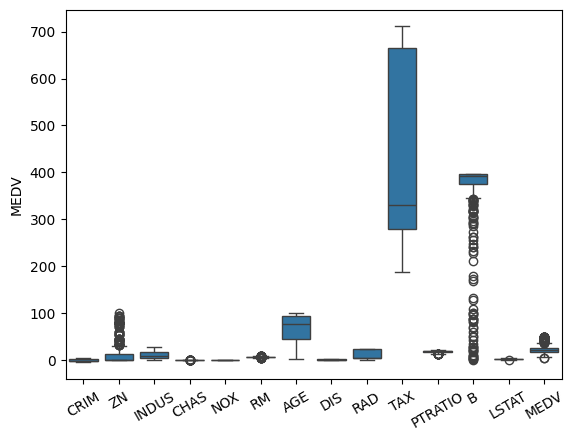

In [20]:
data_melted = pd.melt(df)
fig = sns.boxplot(x = "variable" ,y = "value" , data = data_melted)
plt.ylabel( 'MEDV' )
plt.xlabel( '' )
fig.set_xticklabels(fig.get_xticklabels(),rotation =30 )
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
fit = lin_reg.fit(X_train,y_train)

In [23]:
y_pred_train = lin_reg.predict(X_train)
y_pred = lin_reg.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_evaluation = pd.DataFrame(
    {
        "Data": ["Train", "Test"],
        "RMSE": [np.sqrt(mean_squared_error(y_pred_train, y_train)),
                np.sqrt(mean_squared_error(y_test, y_pred))],
        "MSE": [mean_squared_error(y_pred_train, y_train),
                mean_squared_error(y_test, y_pred)],
        "R2": [r2_score(y_pred_train, y_train),
               r2_score(y_test, y_pred)],
    })

model_evaluation

,Data,RMSE,MSE,R2
0,Train,4.748208,22.545481,0.655010
1,Test,4.638690,21.517444,0.711226


In [25]:
from sklearn.model_selection import cross_val_score
cv_scores_1 = cross_val_score(lin_reg,X_train, y_train, cv=10) # R2
print("Average 10-Fold CV R2 Score: {}".format((np.mean(cv_scores_1)) ))
cv_Score_2 = cross_val_score(lin_reg, X_train, y_train, cv = 10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(cv_Score_2))))


Average 10-Fold CV R2 Score: 0.6875346951141128
Average 10-Fold CV MSE Score: 25.550660791660828


In [26]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe_1 = cross_val_score(pipeline, X_train, y_train,cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(scores_pipe_1)) ))
scores_pipe_2 = cross_val_score(pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2)) ))

Average 10-Fold CV R2 Score: 0.6875346951141131
Average 10-Fold CV MSE Score: 25.550660791660803


In [27]:
import joblib

# Save the trained model
joblib.dump(pipeline, "boston_house_price_model.pkl")

# Save the scaler for consistent input processing
joblib.dump(scaler, "scaler.pkl")

print("Model saved successfully!")


Model saved successfully!


In [28]:
from google.colab import files
files.download("boston_house_price_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>